<a href="https://www.kaggle.com/code/rusinisiyara/tuffline-submitions-01?scriptVersionId=102817782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# American Express - Default Prediction
# Team Tuffline
Team Members

AA1932 - Chamod Eshwarage

AA1884 - Rusini Siyara Liyanachchi

AA1841 - J.A. Ruwini Shashipraba

AA1857 - W.M Shehan Udantha

AA1696 - Prasadi Hansika

# Data Set Problems
American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.

We’ll be apply our machine learning skills to predict credit default which allows lenders to optimize lending decisions.

Data pre-processing and feature engineering will be performed to prepare the dataset before it is used by the machine learning model.

# Objectives
The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile.

# Data Set Description
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories,

D = Delinquency variables

S = Spend variables

P = Payment variables

B = Balance variables

R = Risk variables

with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

Our task is to predict, for each customer_ID, the probability of a future payment default (target = 1).

Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import random

import warnings 
warnings.filterwarnings('ignore')

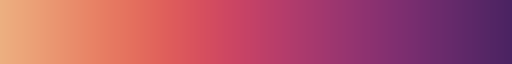

In [2]:
random.seed(42)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
sns.color_palette("flare", as_cmap=True)

# Loding Data

In [3]:

df_train = pd.read_feather('../input/amexfeather/train_data.ftr')
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

test = pd.read_feather('../input/amexfeather/test_data.ftr')
test = test.groupby('customer_ID').tail(1).set_index('customer_ID')                         

In [4]:
df_train.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


# Missing values

Lets take only the latest transaction from each customer.

Latest transaction may have missing values, we will perform forward fill for those missing values.



In [5]:
null_vals = df_train.isna().sum().sort_values(ascending=False)
null_vals[null_vals > 0 ]

D_87     458268
D_88     458086
D_108    456286
D_110    455235
D_111    455235
          ...  
B_33         31
B_22         31
B_16         31
B_20         31
D_112        31
Length: 108, dtype: int64

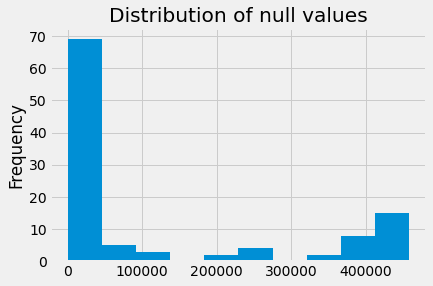

In [6]:
plt.title("Distribution of null values")
null_vals[null_vals > 0 ].plot(kind = 'hist');

There are several columns in our dataset that have close to one million missing values, or almost the same number of rows, so it would be best to remove those columns.

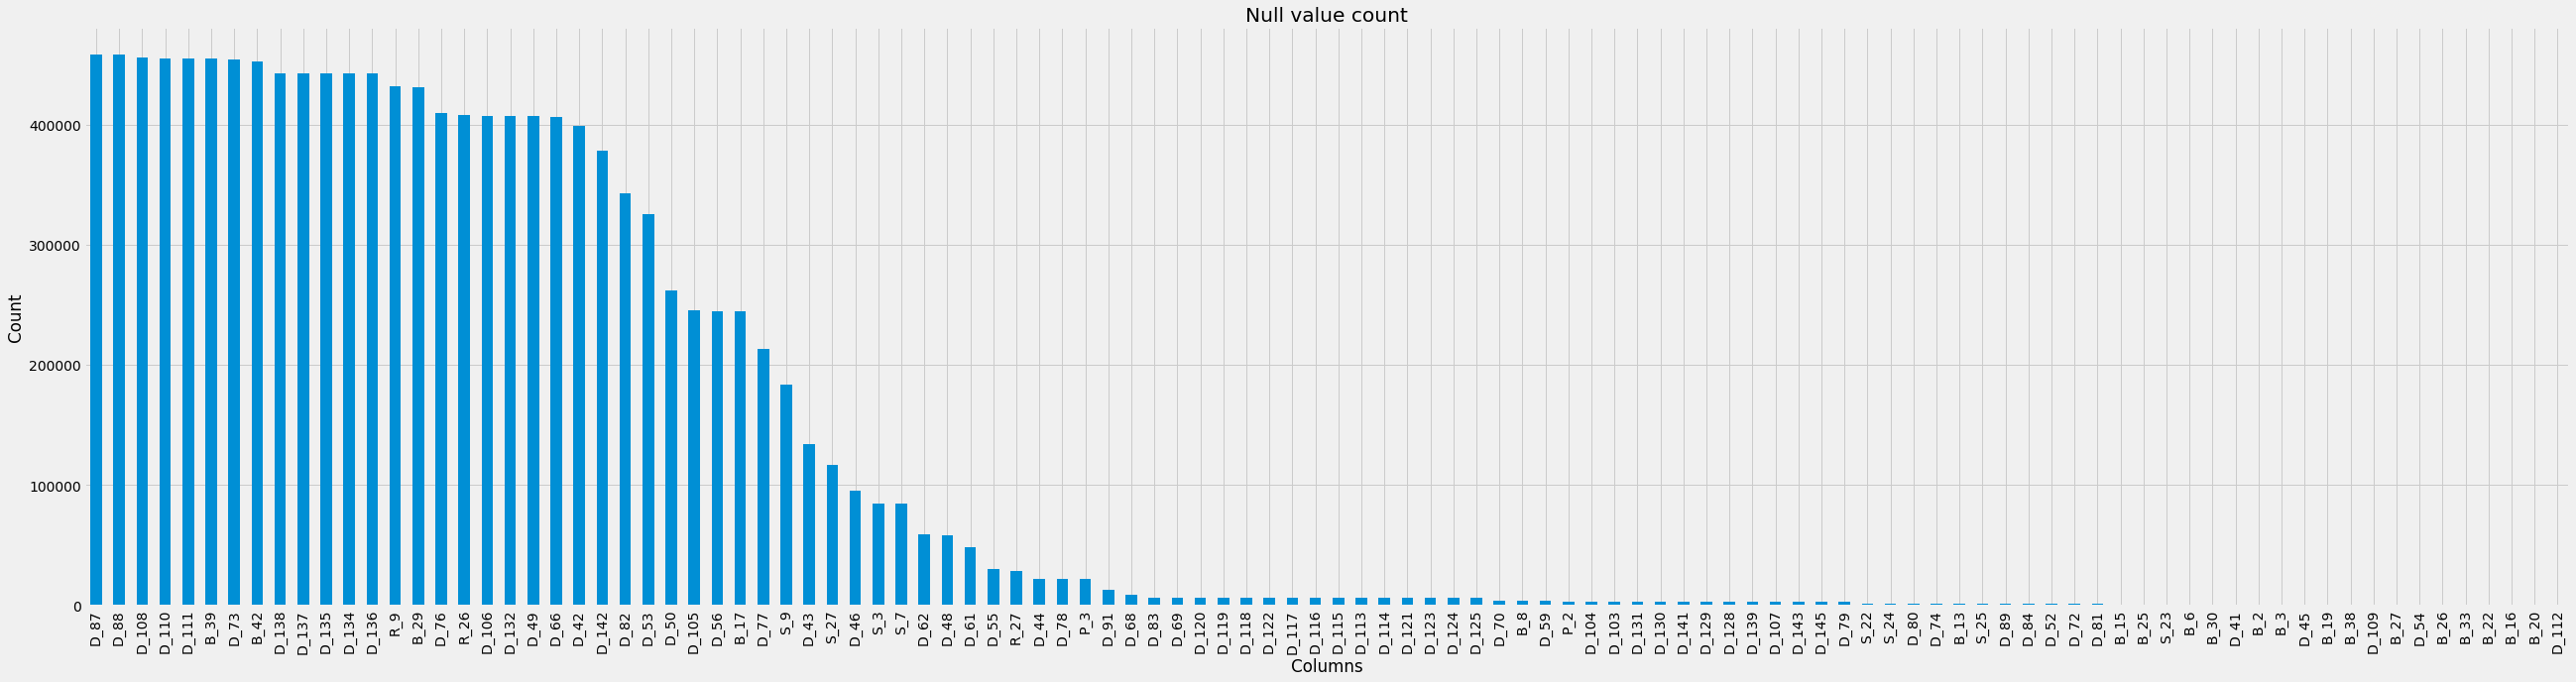

In [7]:
plt.figure(figsize=(40,10))
plt.title("Null value count")
plt.xlabel("Columns")
plt.ylabel("Count")
null_vals[null_vals > 0 ].plot(kind="bar");

# Target Imbalance

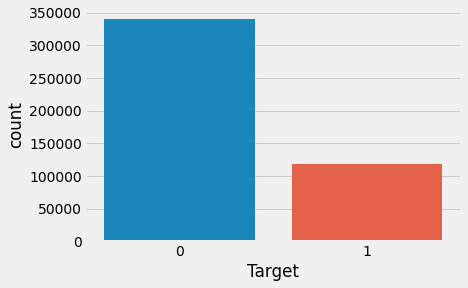

In [8]:
sns.countplot(
    df_train["target"].values,
).set_xlabel("Target");

In [9]:
y = df_train['target']
X = df_train.drop(['target'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26,stratify=y)

print("X_train Training Data Size :",X_train.shape[0])
print("X_test Testing Data Size   :",X_test.shape[0])

X_train Training Data Size : 367130
X_test Testing Data Size   : 91783


# How does each variable correlate with the target?

Count of each type of variables

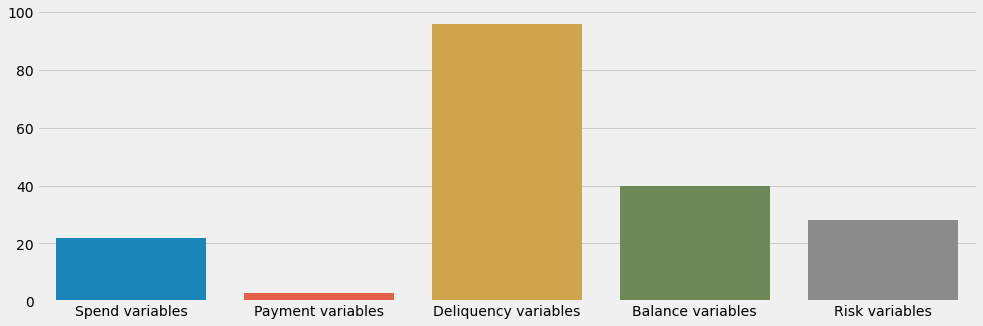

In [11]:
var_count = {}
for col in df_train.columns :
    if col.startswith("S_"):
        var_count["Spend variables"] = var_count.get("Spend variables", 0) + 1 
    if col.startswith("D_"):
        var_count["Deliquency variables"] = var_count.get("Deliquency variables", 0) + 1
    if col.startswith("B_"):
        var_count["Balance variables"] = var_count.get("Balance variables", 0) + 1
    if col.startswith("R_"):
        var_count["Risk variables"] = var_count.get("Risk variables", 0) + 1
    if col.startswith("P_"):
        var_count["Payment variables"] = var_count.get("Payment variables", 0) + 1
plt.figure(figsize=(15,5))
sns.barplot(x=list(var_count.keys()), y=list(var_count.values()));

# Payment variables (P_*) vs Target¶



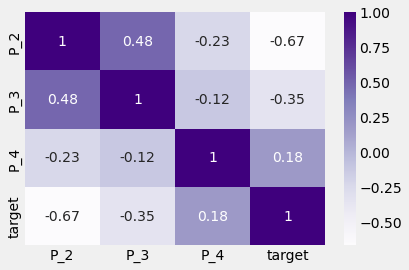

In [12]:
payment_vars = [col for col in df_train.columns if col.startswith("P_")]
corr = df_train[payment_vars+["target"]].corr()
sns.heatmap(corr, annot=True, cmap="Purples");

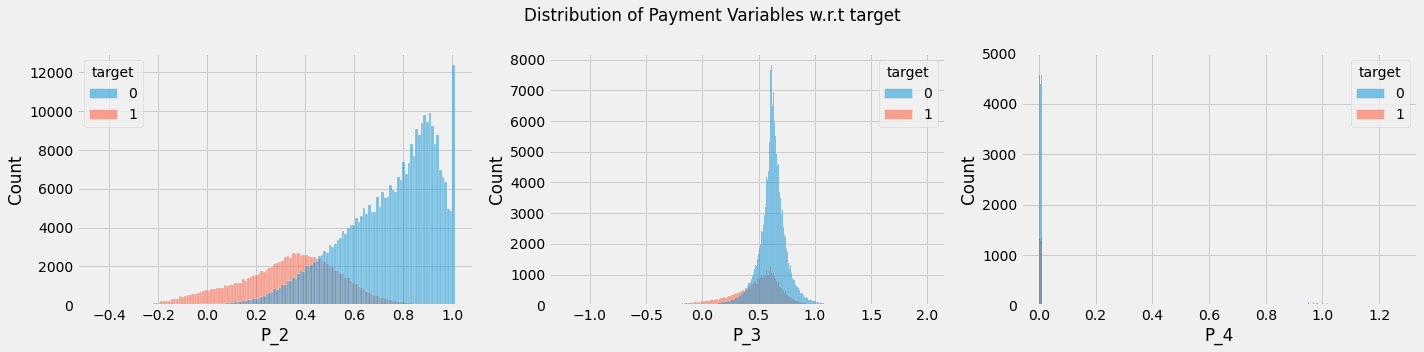

In [13]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
axes = axes.ravel()

for i, col in enumerate(payment_vars)  :
    sns.histplot(data = df_train, x = col, hue='target', ax=axes[i])

fig.suptitle("Distribution of Payment Variables w.r.t target")
fig.tight_layout()

In [14]:
df_train["P_4"].value_counts()

0.964355    2398
0.965332    2365
0.958008    2360
0.956543    2355
0.961914    2355
            ... 
0.000081       1
0.000039       1
1.215820       1
0.000070       1
0.000096       1
Name: P_4, Length: 8769, dtype: int64

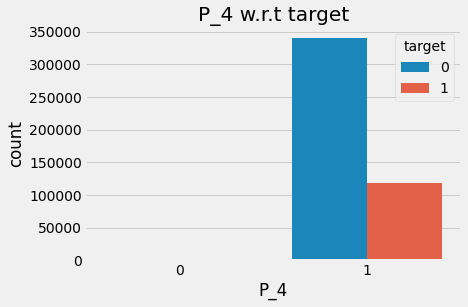

In [15]:
df_train["P_4"] = df_train["P_4"].apply(lambda x : 0 if x == 0 else 1)
plt.title("P_4 w.r.t target")
sns.countplot(data = df_train, x = "P_4", hue = "target");

Higher the P_2 lower the chances of default

Target = 1 (i.e. default) is following a normal distribution in both P_2 and P_3

When P_4 is 1, there's 50% of chance of being default but when it goes 0 lot of cases seem to be having less default

In [16]:
df_train.shape

(458913, 190)

In [17]:
df_train = df_train.dropna(axis=1, thresh=int(0.80 * len(df_train)))
df_train.shape

(458913, 156)

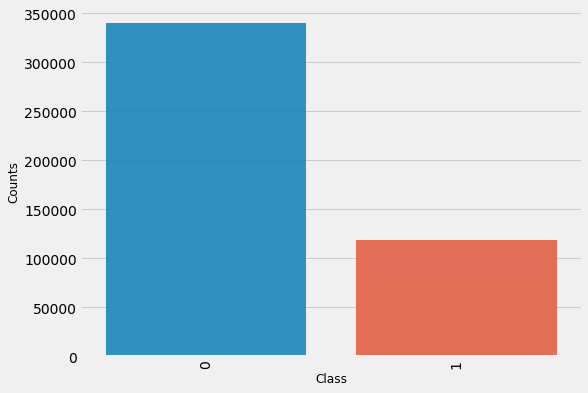

In [18]:
label_counts = df_train['target'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Class', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [19]:
y = df_train['target']
X = df_train.drop(['target'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26,stratify=y)

print("X_train Training Data Size :",X_train.shape[0])
print("X_test Testing Data Size   :",X_test.shape[0])

X_train Training Data Size : 367130
X_test Testing Data Size   : 91783


# Test Data

In [21]:
import numpy as np 
import pandas as pd 
import glob
from scipy.stats import rankdata

paths = [x for x in glob.glob('../input/*/*.csv') if 'amex-default-prediction' not in x]
dfs = [pd.read_csv(x) for x in paths]
dfs = [x.sort_values(by='customer_ID') for x in dfs]

paths = [x for x in glob.glob('../input/*/*.csv') if 'amex-default-prediction' not in x]
paths

for df in dfs:
    df['prediction'] = np.clip(df['prediction'], 0, 1)


# Submitions

In [22]:
submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df in dfs:
    submit['prediction'] += df['prediction']
    
submit['prediction'] /= 4

submit.to_csv('mean_submission.csv', index=None)


submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df in dfs:
    submit['prediction'] += rankdata(df['prediction'])/df.shape[0]
    
submit['prediction'] /= 4

submit.to_csv('rank_submission.csv', index=None)


In [23]:
weights = [0.52, 0.87, 0.95, 0.57, 1, 0.8]

In [24]:
submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df, weight in zip(dfs, weights):
    submit['prediction'] += (df['prediction'] * weight)
    
submit['prediction'] /= np.sum(weights)

submit.to_csv('mean_submission.csv', index=None)

 
submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df, weight in zip(dfs, weights):
    submit['prediction'] += (rankdata(df['prediction'])/df.shape[0]) * weight
    
submit['prediction'] /= 4

submit.to_csv('submission.csv', index=None)    